In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

# Training

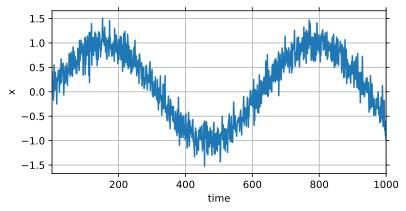

In [2]:
T = 1000 # Generate a total of 1000 points
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [3]:
tau = 4
featuers = torch.zeros((T - tau, tau))
for i in range(tau):
    featuers[:, i] = x[i:T - tau + i]
labels = x[tau:].reshape((-1, 1))

In [4]:
featuers

tensor([[ 0.4002,  0.1420,  0.2100, -0.0459],
        [ 0.1420,  0.2100, -0.0459, -0.1705],
        [ 0.2100, -0.0459, -0.1705, -0.0175],
        ...,
        [-0.1776, -0.3984, -0.7868, -0.7145],
        [-0.3984, -0.7868, -0.7145, -0.8988],
        [-0.7868, -0.7145, -0.8988, -0.6138]])

In [5]:
featuers.shape

torch.Size([996, 4])

In [6]:
labels

tensor([[-1.7049e-01],
        [-1.7475e-02],
        [ 5.4715e-01],
        [ 1.8872e-02],
        [ 8.3666e-02],
        [ 1.5157e-01],
        [ 4.0058e-01],
        [ 5.1945e-02],
        [ 2.1748e-01],
        [ 2.7431e-01],
        [-2.4811e-01],
        [ 2.8441e-01],
        [ 2.2078e-01],
        [ 2.2428e-01],
        [ 3.7187e-01],
        [ 4.4169e-01],
        [ 3.9955e-01],
        [ 3.0599e-01],
        [-9.1761e-03],
        [ 4.4775e-01],
        [ 1.5352e-01],
        [ 4.6829e-01],
        [ 2.4410e-01],
        [ 6.7136e-01],
        [ 1.8726e-01],
        [ 3.4925e-01],
        [ 4.5130e-01],
        [ 5.6691e-01],
        [ 5.0475e-01],
        [ 5.8318e-01],
        [ 3.6726e-01],
        [-6.3057e-02],
        [ 1.9243e-01],
        [ 4.2108e-01],
        [ 3.2350e-01],
        [ 5.2342e-01],
        [ 1.7526e-01],
        [ 2.4356e-01],
        [ 3.8336e-01],
        [ 2.6368e-01],
        [ 5.7883e-01],
        [ 4.3791e-01],
        [ 1.3204e-01],
        [ 4

In [7]:
labels.shape

torch.Size([996, 1])

In [8]:
batch_size, n_train = 16, 600
# Only the first `n_train` examples are used for training
train_iter = d2l.load_array((featuers[:n_train], labels[:n_train]),
                           batch_size, is_train=True)

In [9]:
# Function for initializing the weights of the network
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

# A simple MLP
def get_net():
    net = nn.Sequential(nn.Linear(4, 10), nn.ReLU(), nn.Linear(10, 1))
    net.apply(init_weights)
    return net

# Square loss
loss = nn.MSELoss()

In [10]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()
        print(f'epoch {epoch+1}, loss: {d2l.evaluate_loss(net, train_iter, loss):f}')
        
net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.064264
epoch 2, loss: 0.056290
epoch 3, loss: 0.051884
epoch 4, loss: 0.050370
epoch 5, loss: 0.049710


# Prediction

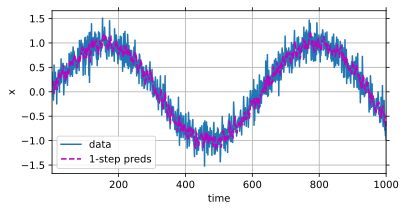

In [11]:
onestep_preds = net(featuers)
d2l.plot(
    [time, time[tau:]],
    [x.detach().numpy(), onestep_preds.detach().numpy()],
    'time', 'x',
    legend=['data', '1-step preds'],
    xlim=[1, 1000], figsize=[6, 3]
)

In [12]:
multistep_preds = torch.zeros(T)
multistep_preds[:n_train + tau] = x[:n_train + tau]
multistep_preds

tensor([ 4.0024e-01,  1.4197e-01,  2.0999e-01, -4.5857e-02, -1.7049e-01,
        -1.7475e-02,  5.4715e-01,  1.8872e-02,  8.3666e-02,  1.5157e-01,
         4.0058e-01,  5.1945e-02,  2.1748e-01,  2.7431e-01, -2.4811e-01,
         2.8441e-01,  2.2078e-01,  2.2428e-01,  3.7187e-01,  4.4169e-01,
         3.9955e-01,  3.0599e-01, -9.1761e-03,  4.4775e-01,  1.5352e-01,
         4.6829e-01,  2.4410e-01,  6.7136e-01,  1.8726e-01,  3.4925e-01,
         4.5130e-01,  5.6691e-01,  5.0475e-01,  5.8318e-01,  3.6726e-01,
        -6.3057e-02,  1.9243e-01,  4.2108e-01,  3.2350e-01,  5.2342e-01,
         1.7526e-01,  2.4356e-01,  3.8336e-01,  2.6368e-01,  5.7883e-01,
         4.3791e-01,  1.3204e-01,  4.2880e-01,  3.6449e-01,  4.8874e-01,
         4.0494e-01,  7.8384e-01,  7.5848e-01,  5.3971e-01,  3.1823e-01,
         7.4667e-01,  5.0251e-01,  8.1066e-01,  3.5583e-01,  6.5525e-01,
         7.6347e-01,  3.1685e-01,  7.6710e-01,  9.1692e-01,  8.1541e-01,
         4.6007e-01,  8.2201e-01,  6.9426e-01,  4.9

In [13]:
for i in range(n_train + tau, T):
    multistep_preds[i] = net(multistep_preds[i - tau:i].reshape((1, -1)))
multistep_preds

tensor([ 4.0024e-01,  1.4197e-01,  2.0999e-01, -4.5857e-02, -1.7049e-01,
        -1.7475e-02,  5.4715e-01,  1.8872e-02,  8.3666e-02,  1.5157e-01,
         4.0058e-01,  5.1945e-02,  2.1748e-01,  2.7431e-01, -2.4811e-01,
         2.8441e-01,  2.2078e-01,  2.2428e-01,  3.7187e-01,  4.4169e-01,
         3.9955e-01,  3.0599e-01, -9.1761e-03,  4.4775e-01,  1.5352e-01,
         4.6829e-01,  2.4410e-01,  6.7136e-01,  1.8726e-01,  3.4925e-01,
         4.5130e-01,  5.6691e-01,  5.0475e-01,  5.8318e-01,  3.6726e-01,
        -6.3057e-02,  1.9243e-01,  4.2108e-01,  3.2350e-01,  5.2342e-01,
         1.7526e-01,  2.4356e-01,  3.8336e-01,  2.6368e-01,  5.7883e-01,
         4.3791e-01,  1.3204e-01,  4.2880e-01,  3.6449e-01,  4.8874e-01,
         4.0494e-01,  7.8384e-01,  7.5848e-01,  5.3971e-01,  3.1823e-01,
         7.4667e-01,  5.0251e-01,  8.1066e-01,  3.5583e-01,  6.5525e-01,
         7.6347e-01,  3.1685e-01,  7.6710e-01,  9.1692e-01,  8.1541e-01,
         4.6007e-01,  8.2201e-01,  6.9426e-01,  4.9

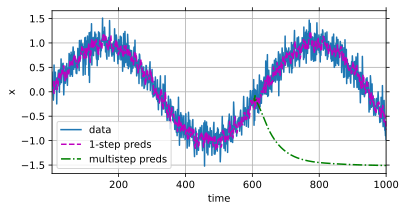

In [14]:
d2l.plot(
    [time, time[tau:], time[n_train + tau:]],
    [x.detach().numpy(), 
     onestep_preds.detach().numpy(),
     multistep_preds[n_train + tau:].detach().numpy()],
    'time', 'x',
    legend=['data', '1-step preds', 'multistep preds'],
    xlim=[1, 1000], figsize=[6, 3]
)

In [15]:
max_steps = 64

In [16]:
featuers = torch.zeros((T - tau - max_steps + 1, tau + max_steps))
featuers.shape

torch.Size([933, 68])

In [17]:
# Column `i` (`i` < `tau`) are observations from `x` for time steps
# from `i + 1` to `i + T - tau - max_steps + 1`
for i in range(tau):
    featuers[:, i] = x[i: i + T - tau - max_steps + 1]


In [18]:
# Column `i` (`i` >= `tau`) are the (`i - tau + 1`)-step-ahead predictions
# for time steps from `i + 1` to `i + T - tau - max_steps + 1`
for i in range(tau, tau + max_steps):
    featuers[:, i] = net(featuers[:, i - tau:i]).reshape(-1)

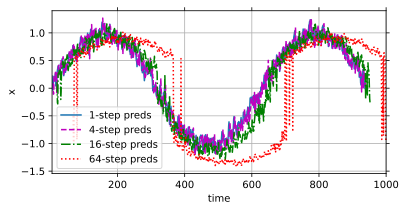

In [19]:
steps = [1, 4, 16, 64]
d2l.plot(
    [time[tau + i - 1: T - max_steps + i] for i in steps],
    [featuers[:, (tau + i - 1)].detach().numpy() for i in steps],
    'time', 'x',
    legend=[f'{i}-step preds' for i in steps],
    xlim=[5, 1000], figsize=(6 ,3)
)